In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
#handle missing data
missing_values_count = df.isna().sum()

print(missing_values_count)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


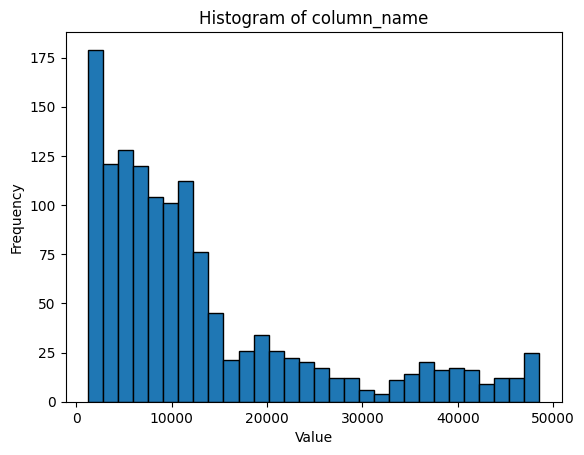

In [7]:
# handling outliers using histogram or boxplot method
for column in df.columns:
    data = df[column]

# Handling outliers by capping them at the 1st and 99th percentiles
lower_bound = np.percentile(data, 1)
upper_bound = np.percentile(data, 99)
data = np.clip(data, lower_bound, upper_bound)

# Plotting the histogram
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Convert categorical features using either get_dummies or map encoding.
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [10]:
#Scale the data using min-max scaler: (X-X.min())/(X.max()-X.min())
df_scaled = (df - df.min()) / (df.max() - df.min())

print(df_scaled.head())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
#linear regression and display training and testing errors

In [ ]:
#polynomial regression and display training and testing errors

In [ ]:
#random forest regression and display training and testing errors